# Calculating Option Greeks

In [1]:
import numpy as np
from math import log, e, pi
from scipy.stats import norm
import matplotlib

class BS(object):
    def __init__(self, args):
        self.Type = int(args[0])                  # 1 for a Call, - 1 for a put
        self.S = float(args[1])                   # Underlying asset price
        self.K = float(args[2])                   # Option strike K
        self.r = float(args[3])                   # Continuous risk free rate
        self.T = float(args[4]) /365              # Time to expiry
        self.sigma = float(args[5]) /100          # Underlying volatility
        
        self.t = float(args[4])
        self.sigmaT = self.sigma * self.T ** 0.5
        self.dr = e ** -(self.r * self.T)
        self.d1 = (log(self.S / self.K) + (self.r + 0.5 * (self.sigma ** 2)) * self.T) / self.sigmaT
        self.d2 = (log(self.S / self.K) + (self.r - 0.5 * (self.sigma ** 2)) * self.T) / self.sigmaT
        self.Price = self.Type * (self.S * norm.cdf(self.Type * self.d1) - self.K * self.dr * norm.cdf(self.Type * self.d2))
        self.Delta = norm.cdf(self.Type * self.d1)
        self.Gamma = norm.pdf(self.d1) / (self.S * self.sigmaT)
        self.Vega = self.S * norm.pdf(self.d1) * self.T ** 0.5
        self.Rho = self.Type * self.K * self.T * self.dr * norm.cdf(self.Type * self.d2)
        self.Theta = (-0.5 * self.S * norm.pdf(self.d1) * self.sigma / (self.T ** 0.5) - self.Type * self.r * self.K * self.dr * norm.cdf(self.Type * self.d2))
    
    
    def KO(self):
        print('Stock Ticker: KO', '\n'
              'Option: Call', '\n'
              'Date: Feb 12th 2018', '\n'
              'Time to expiry: %2d' % self.t, '\n'
              'Underlying stock price: %.2f' % self.S, '\n'
              'Strike Price: %.1f' % self.K, '\n'
              'Option Price: %.3f' % self.Price, '\n'
              'delta: %.3f' % self.Delta, '\n'
              'gamma: %.3f' % self.Gamma, '\n'
              'vega: %.3f' % self.Vega, '\n'
              'rho: %.3f' % self.Rho, '\n'
              'theta: %.3f' % self.Theta)

    def XOM(self):
        print('Stock Ticker: XOM', '\n'
              'Option: Call', '\n'
              'Date: Feb 12th 2018', '\n'
              'Time to expiry: %2d' % self.t, '\n'
              'Underlying stock price: %.2f' % self.S, '\n'
              'Strike Price: %.1f' % self.K, '\n'
              'Option Price: %.3f' % self.Price, '\n'
              'delta: %.3f' % self.Delta, '\n'
              'gamma: %.3f' % self.Gamma, '\n'
              'vega: %.3f' % self.Vega, '\n'
              'rho: %.3f' % self.Rho, '\n'
              'theta: %.3f' % self.Theta)
        

# Finite Diffrencing

In [2]:
import random

def finite_differencing(c):
    epsilon = random.random()
    C = BS(c)
    temp1 = c[:]
    temp1_ = c[:]
    temp1[1] += epsilon
    temp1_[1] += - epsilon
    Temp1 = BS(temp1)
    Temp1_ = BS(temp1_)
    Delta = (Temp1.Price - C.Price) / epsilon

    
    Gamma = (Temp1.Price + Temp1_.Price - 2* C.Price) / (epsilon ** 2)

    
    temp2 = c[:]
    temp2[5] += epsilon
    Temp2 = BS(temp2)
    Vega = (Temp2.Price - C.Price) / (epsilon / 100)

        
    temp3 = c[:]
    temp3[3] += epsilon / 100
    Temp3 = BS(temp3)
    Rho = (Temp3.Price - C.Price) / (epsilon / 100)

        
    temp4 = c[:]
    temp4[4] += epsilon
    Temp4 = BS(temp4)
    Theta = (C.Price - Temp4.Price) / (epsilon / 365)
    
    print('Testing with finite deffrencing', '\n'
          'delta: %.3f' % Delta, '\n'
          'gamma: %.3f' % Gamma, '\n'
          'vega: %.3f' % Vega, '\n'
          'rho: %.3f' % Rho, '\n'
          'theta: %.3f' % Theta) 
    
    

# Graphs

# Monte Carlo Greeks

## Same Random Greeks

In [3]:
n = 1000

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from functools import reduce
import random

class MCs():
    def __init__(self,c):
        self.c = c[:]
        self.st_mean = 0
        self.Price=0
        st=[]
        price=[]
        np.random.seed(5)
        plt.cla()
        for _ in range(n):
            daily_returns = np.random.normal((self.c[3] / 365), self.c[5] / (100 * math.sqrt(365)), int(self.c[4])) + 1
            price_list = [self.c[1]]
            for x in daily_returns:
                price_list.append(price_list[-1]*x)
            plt.plot(price_list)
            st.append(price_list[-1])
            price.append(max(price_list[-1] - self.c[2],0))
        self.st_mean = np.mean(st)
        self.Price = np.mean(price)
        
    def plot(self):
        plt.show()
        print('The mean value of ST is: %.3f' % self.st_mean)
        print('The mean value of call option price is: %.3f' % self.Price)

    

In [5]:
def MCs_finite_differencing(c):
    random.seed(5)
    epsilon = random.random()
    np.random.seed(5)
    C = MCs(c)
    
    mctemp1 = c[:]
    mctemp1_ = c[:]
    mctemp1[1] += epsilon
    mctemp1_[1] += - epsilon
    MTemp1 = MCs(mctemp1)
    MTemp1_ = MCs(mctemp1_)
    Delta = (MTemp1.Price - C.Price) / epsilon


    Gamma = (MTemp1.Price + MTemp1_.Price - 2* C.Price) / (epsilon ** 2)


    mctemp2 = c[:]
    mctemp2[5] += epsilon
    MTemp2 = MCs(mctemp2)
    Vega = (MTemp2.Price - C.Price) / (epsilon / 100)


    mctemp3 = c[:]
    mctemp3[3] += epsilon / 100
    MTemp3 = MCs(mctemp3)
    Rho = (MTemp3.Price - C.Price) / (epsilon / 100)


    mctemp4 = c[:]
    mctemp4[4] += epsilon * 10
    MTemp4 = MCs(mctemp4)
    Theta = (C.Price - MTemp4.Price) / (epsilon * 10 / 365)

    print('Monte Carlo Greeks with same random', '\n'
          'delta: %.3f' % Delta, '\n'
          'gamma: %.3f' % Gamma, '\n'
          'vega: %.3f' % Vega, '\n'
          'rho: %.3f' % Rho, '\n'
          'theta: %.3f' % Theta) 




## Different Random Greeks

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from functools import reduce
import random

class MC():
    def __init__(self,c):
        self.c = c[:]
        self.st_mean = 0
        self.Price=0
        st=[]
        price=[]
        plt.cla()
        for _ in range(n):
            daily_returns = np.random.normal((self.c[3] / 365), self.c[5] / (100 * math.sqrt(365)), int(self.c[4])) + 1
            price_list = [self.c[1]]
            for x in daily_returns:
                price_list.append(price_list[-1]*x)
            plt.plot(price_list)
            st.append(price_list[-1])
            price.append(max(price_list[-1] - self.c[2],0))
        self.st_mean = np.mean(st)
        self.Price = np.mean(price)
        
    def plot(self):
        plt.show()
        print('The mean value of ST is: %.3f' % self.st_mean)
        print('The mean value of call option price is: %.3f' % self.Price)

    
    

In [7]:
def MC_finite_differencing(c):
    epsilon = random.random()
    C = MC(c)

    mctemp1 = c[:]
    mctemp1_ = c[:]
    mctemp1[1] += epsilon
    mctemp1_[1] += - epsilon
    MTemp1 = MC(mctemp1)
    MTemp1_ = MC(mctemp1_)
    Delta = (MTemp1.Price - C.Price) / epsilon


    Gamma = (MTemp1.Price + MTemp1_.Price - 2* C.Price) / (epsilon ** 2)


    mctemp2 = c[:]
    mctemp2[5] += epsilon
    MTemp2 = MC(mctemp2)
    Vega = (MTemp2.Price - C.Price) / (epsilon / 100)


    mctemp3 = c[:]
    mctemp3[3] += epsilon / 100
    MTemp3 = MC(mctemp3)
    Rho = (MTemp3.Price - C.Price) / (epsilon / 100)


    mctemp4 = c[:]
    mctemp4[4] += epsilon
    MTemp4 = MC(mctemp4)
    Theta = (C.Price - MTemp4.Price) / (epsilon / 365)

    print('Monte Carlo Greeks with different random', '\n'
          'delta: %.3f' % Delta, '\n'
          'gamma: %.3f' % Gamma, '\n'
          'vega: %.3f' % Vega, '\n'
          'rho: %.3f' % Rho, '\n'
          'theta: %.3f' % Theta) 






### Pathwise Method for $\Delta$

In [8]:
from math import e
from functools import reduce
def pathwiseDelta(c):
    delta = []
    for _ in range(n):
        daily_returns = np.random.normal((c[3] / 365), c[5] / (100 * math.sqrt(365)), int(c[4])) + 1
        st = reduce(lambda x, y : x * y, daily_returns) * c[1]
        index =(1 if st - c[2] > 0 else 0 )
        delta.append((e ** -(c[3] * c[4] / 365)) * index * st / c[1])
    print('Pathwise Method for delta is: %.3f' % np.mean(delta))
    
    

### Likelihood Ratio Method for $\Delta$

In [9]:
from math import e,log
from functools import reduce
def likelihoodDelta(c):
    delta = []
    for _ in range(n):
        daily_returns = np.random.normal((c[3] / 365), c[5] / (100 * math.sqrt(365)), int(c[4])) + 1
        st = reduce(lambda x,y:x*y,daily_returns)*c[1]
        index =(st-c[2] if st - c[2] > 0 else 0 )
        xi = (log(st / c[1]) - (c[3] - (c[5] / 100) ** 2 / 2) * c[5] / 100) / (c[5] / 100 * math.sqrt(c[4] / 365))
        delta.append((e**-(c[3]*c[4]/365))*index*xi/(c[1]*math.sqrt(c[4]/365)*c[5]/100))
    print('Likelihood Ratio Method for delta is: %.3f' % np.mean(delta))
    
    

# Results

In [10]:
K1 = [1, 43.59, 42, 0.03, 32, 23.9027]
K2 = [1, 43.59, 44, 0.03, 32, 21.1747]
K3 = [1, 43.59, 46, 0.03, 32, 19.8744]
K4 = [1, 43.59, 42, 0.03, 67, 22.0376]
K5 = [1, 43.59, 44, 0.03, 67, 19.6237]
K6 = [1, 43.59, 46, 0.03, 67, 18.2047]
X1 = [1, 75.65, 72.5, 0.03, 32, 27.1732]
X2 = [1, 75.65, 75, 0.03, 32, 24.7258]
X3 = [1, 75.65, 77.5, 0.03, 32, 23.2191]
X4 = [1, 75.65, 72.5, 0.03, 67, 24.4788]
X5 = [1, 75.65, 75, 0.03, 67, 22.8503]
X6 = [1, 75.65, 77.5, 0.03, 67, 21.6262]



In [11]:
# k1 = BS(K1)
# k1.KO()
# finite_differencing(K1)
# pathwiseDelta(K1)
# likelihoodDelta(K1)



In [12]:
# mcsk1 = MCs(K1)
# mcsk1.plot()
# MCs_finite_differencing(K1)
# mck1 = MC(K1)
# mck1.plot()
# MC_finite_differencing(K1)



In [13]:
k2 = BS(K2)
k2.KO()
finite_differencing(K2)
pathwiseDelta(K2)
likelihoodDelta(K2)



Stock Ticker: KO 
Option: Call 
Date: Feb 12th 2018 
Time to expiry: 32 
Underlying stock price: 43.59 
Strike Price: 44.0 
Option Price: 0.953 
delta: 0.470 
gamma: 0.146 
vega: 5.134 
rho: 1.711 
theta: -6.786
Testing with finite deffrencing 
delta: 0.486 
gamma: 0.145 
vega: 5.134 
rho: 1.714 
theta: -6.775
Pathwise Method for delta is: 0.459
Likelihood Ratio Method for delta is: 0.442


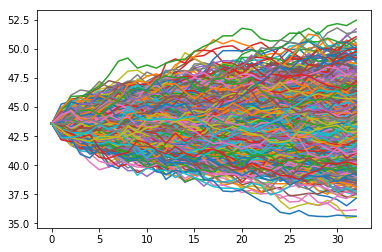

The mean value of ST is: 43.770
The mean value of call option price is: 1.010
Monte Carlo Greeks with same random 
delta: 0.538 
gamma: 0.136 
vega: 5.432 
rho: 1.888 
theta: -5.346


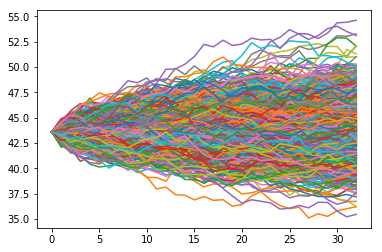

The mean value of ST is: 43.857
The mean value of call option price is: 1.023
Monte Carlo Greeks with different random 
delta: 0.522 
gamma: 0.109 
vega: 2.467 
rho: 2.417 
theta: -4.448


In [14]:
mcsk2 = MCs(K2)
mcsk2.plot()
MCs_finite_differencing(K2)
mck2 = MC(K2)
mck2.plot()
MC_finite_differencing(K2)



In [15]:
# k3 = BS(K3)
# k3.KO()
# finite_differencing(K3)
# pathwiseDelta(K3)
# likelihoodDelta(K3)



In [16]:
# mcsk3 = MCs(K3)
# mcsk3.plot()
# MCs_finite_differencing(K3)
# mck3 = MC(K3)
# mck3.plot()
# MC_finite_differencing(K3)



In [17]:
# k4 = BS(K4)
# k4.KO()
# finite_differencing(K4)
# pathwiseDelta(K4)
# likelihoodDelta(K4)



In [18]:
# mcsk4 = MCs(K4)
# mcsk4.plot()
# MCs_finite_differencing(K4)
# mck4 = MC(K4)
# mck4.plot()
# MC_finite_differencing(K4)



In [19]:
k5 = BS(K5)
k5.KO()
finite_differencing(K5)
pathwiseDelta(K5)
likelihoodDelta(K5)



Stock Ticker: KO 
Option: Call 
Date: Feb 12th 2018 
Time to expiry: 67 
Underlying stock price: 43.59 
Strike Price: 44.0 
Option Price: 1.382 
delta: 0.498 
gamma: 0.109 
vega: 7.450 
rho: 3.735 
theta: -4.593
Testing with finite deffrencing 
delta: 0.541 
gamma: 0.108 
vega: 7.451 
rho: 3.760 
theta: -4.581
Pathwise Method for delta is: 0.501
Likelihood Ratio Method for delta is: 0.499


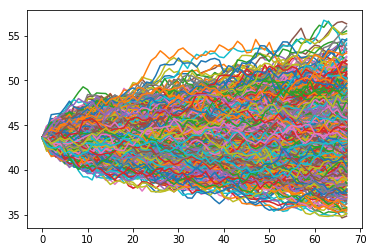

The mean value of ST is: 43.976
The mean value of call option price is: 1.480
Monte Carlo Greeks with same random 
delta: 0.543 
gamma: 0.118 
vega: 7.999 
rho: 4.118 
theta: -5.967


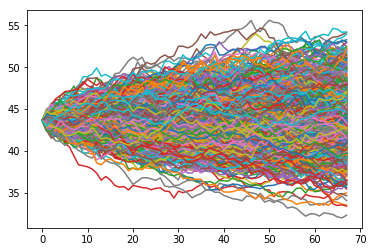

The mean value of ST is: 43.821
The mean value of call option price is: 1.361
Monte Carlo Greeks with different random 
delta: 0.623 
gamma: 0.430 
vega: 20.664 
rho: -0.061 
theta: -13.473


In [20]:
mcsk5 = MCs(K5)
mcsk5.plot()
MCs_finite_differencing(K5)
mck5 = MC(K5)
mck5.plot()
MC_finite_differencing(K5)



In [21]:
# k6 = BS(K6)
# k6.KO()
# finite_differencing(K6)
# pathwiseDelta(K6)
# likelihoodDelta(K6)



In [22]:
# mcsk6 = MCs(K6)
# mcsk6.plot()
# MCs_finite_differencing(K6)
# mck6 = MC(K6)
# mck6.plot()
# MC_finite_differencing(K6)



In [23]:
# x1 = BS(X1)
# x1.XOM()
# finite_differencing(X1)
# pathwiseDelta(X1)
# likelihoodDelta(X1)



In [24]:
# mcsx1 = MCs(X1)
# mcsx1.plot()
# MCs_finite_differencing(X1)
# mcx1 = MC(X1)
# mcx1.plot()
# MC_finite_differencing(X1)



In [25]:
x2 = BS(X2)
x2.XOM()
finite_differencing(X2)
pathwiseDelta(X2)
likelihoodDelta(X2)



Stock Ticker: XOM 
Option: Call 
Date: Feb 12th 2018 
Time to expiry: 32 
Underlying stock price: 75.65 
Strike Price: 75.0 
Option Price: 2.646 
delta: 0.576 
gamma: 0.071 
vega: 8.776 
rho: 3.585 
theta: -13.602
Testing with finite deffrencing 
delta: 0.603 
gamma: 0.071 
vega: 8.779 
rho: 3.596 
theta: -13.526
Pathwise Method for delta is: 0.556
Likelihood Ratio Method for delta is: 0.514


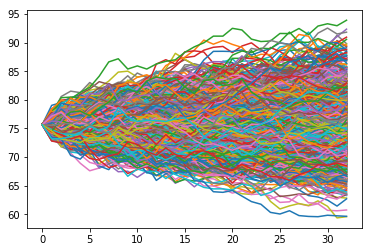

The mean value of ST is: 75.982
The mean value of call option price is: 2.793
Monte Carlo Greeks with same random 
delta: 0.618 
gamma: 0.070 
vega: 9.301 
rho: 3.954 
theta: -10.178


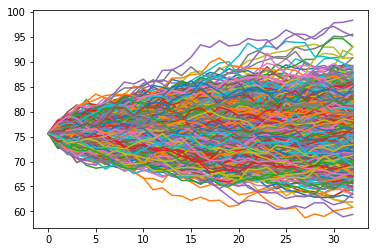

The mean value of ST is: 76.157
The mean value of call option price is: 2.820
Monte Carlo Greeks with different random 
delta: 0.588 
gamma: -0.030 
vega: 0.551 
rho: 2.644 
theta: -14.727


In [26]:
mcsx2 = MCs(X2)
mcsx2.plot()
MCs_finite_differencing(X2)
mcx2 = MC(X2)
mcx2.plot()
MC_finite_differencing(X2)



In [27]:
# x3 = BS(X3)
# x3.XOM()
# finite_differencing(X3)
# pathwiseDelta(X3)
# likelihoodDelta(X3)



In [28]:
# mcsx3 = MCs(X3)
# mcsx3.plot()
# MCs_finite_differencing(X3)
# mcx3 = MC(X3)
# mcx3.plot()
# MC_finite_differencing(X3)



In [29]:
# x4 = BS(X4)
# x4.XOM()
# finite_differencing(X4)
# pathwiseDelta(X4)
# likelihoodDelta(X4)



In [30]:
# mcsx4 = MCs(X4)
# mcsx4.plot()
# MCs_finite_differencing(X4)
# mcx4 = MC(X4)
# mcx4.plot()
# MC_finite_differencing(X4)



In [31]:
x5 = BS(X5)
x5.XOM()
finite_differencing(X5)
pathwiseDelta(X5)
likelihoodDelta(X5)



Stock Ticker: XOM 
Option: Call 
Date: Feb 12th 2018 
Time to expiry: 67 
Underlying stock price: 75.65 
Strike Price: 75.0 
Option Price: 3.494 
delta: 0.577 
gamma: 0.053 
vega: 12.691 
rho: 7.366 
theta: -9.103
Testing with finite deffrencing 
delta: 0.597 
gamma: 0.053 
vega: 12.695 
rho: 7.401 
theta: -9.079
Pathwise Method for delta is: 0.574
Likelihood Ratio Method for delta is: 0.577


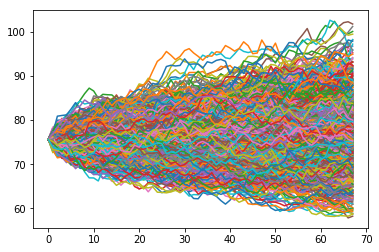

The mean value of ST is: 76.364
The mean value of call option price is: 3.707
Monte Carlo Greeks with same random 
delta: 0.610 
gamma: 0.064 
vega: 13.666 
rho: 8.248 
theta: -12.291


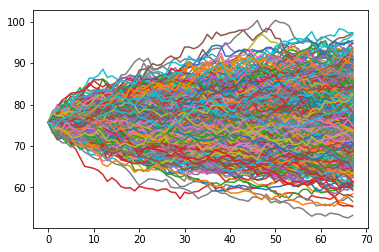

The mean value of ST is: 76.048
The mean value of call option price is: 3.459
Monte Carlo Greeks with different random 
delta: 0.737 
gamma: 0.648 
vega: 37.759 
rho: -5.758 
theta: -15.743


In [32]:
mcsx5 = MCs(X5)
mcsx5.plot()
MCs_finite_differencing(X5)
mcx5 = MC(X5)
mcx5.plot()
MC_finite_differencing(X5)



In [33]:
# x6 = BS(X6)
# x6.XOM()
# finite_differencing(X6)
# pathwiseDelta(X6)
# likelihoodDelta(X6)



In [34]:
# mcsx6 = MCs(X6)
# mcsx6.plot()
# MCs_finite_differencing(X6)
# mcx6 = MC(X6)
# mcx6.plot()
# MC_finite_differencing(X6)

